In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix

In [2]:
df = pd.read_csv('Dataset_spine.csv')
df = df.drop(['Unnamed: 13'], axis=1)
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [3]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [4]:
df = df.drop(['Col7','Col8','Col9','Col10','Col11','Col12'], axis=1)
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
y = df['Class_att']
x = df.drop(['Class_att'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25,random_state=27)


In [6]:
x_train

,Col1,Col2,Col3,Col4,Col5,Col6
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750
274,43.191915,9.976664,28.938149,33.215251,123.467400,1.741018
122,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316
269,37.140150,16.481240,24.000000,20.658910,125.014361,7.366425
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629
...,...,...,...,...,...,...
293,48.902904,5.587589,55.500000,43.315316,137.108289,19.854759
240,41.646916,8.835549,36.031975,32.811367,116.555168,-6.054538
31,46.390260,11.079047,32.136553,35.311213,98.774546,6.386832
184,81.056611,20.801492,91.784495,60.255119,125.430176,38.181782


In [7]:
x_test

,Col1,Col2,Col3,Col4,Col5,Col6
70,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537
69,58.599529,-0.261499,51.500000,58.861028,102.042812,28.059697
21,54.919443,21.062332,42.200000,33.857110,125.212716,2.432561
228,38.046551,8.301669,26.236830,29.744881,123.803413,3.885773
200,63.364339,20.024621,67.498705,43.339718,130.999258,37.556706
...,...,...,...,...,...,...
188,85.680950,38.650035,82.680977,47.030914,120.840707,61.959034
295,46.426366,6.620795,48.100000,39.805571,130.350096,2.449382
268,57.145851,16.489091,42.842148,40.656760,113.806178,5.015186
54,41.171680,17.321206,33.469403,23.850474,116.377889,-9.569250


In [8]:
y_train

308      Normal
274      Normal
122    Abnormal
269      Normal
208    Abnormal
         ...   
293      Normal
240      Normal
31     Abnormal
184    Abnormal
19     Abnormal
Name: Class_att, Length: 232, dtype: object

In [9]:
y_test

70     Abnormal
69     Abnormal
21     Abnormal
228      Normal
200    Abnormal
         ...   
188    Abnormal
295      Normal
268      Normal
54     Abnormal
40     Abnormal
Name: Class_att, Length: 78, dtype: object

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=500, alpha=0.0001,solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


Iteration 1, loss = 11.34406094
Iteration 2, loss = 11.37134504
Iteration 3, loss = 3.83511946
Iteration 4, loss = 2.84626233
Iteration 5, loss = 1.59617769
Iteration 6, loss = 0.98191110
Iteration 7, loss = 1.01197122
Iteration 8, loss = 1.18898419
Iteration 9, loss = 0.82847246
Iteration 10, loss = 0.81903033
Iteration 11, loss = 0.68004349
Iteration 12, loss = 0.68962666
Iteration 13, loss = 0.70416424
Iteration 14, loss = 0.66151892
Iteration 15, loss = 0.57481294
Iteration 16, loss = 0.58470280
Iteration 17, loss = 0.56371141
Iteration 18, loss = 0.58071918
Iteration 19, loss = 0.52035246
Iteration 20, loss = 0.51704537
Iteration 21, loss = 0.63255104
Iteration 22, loss = 0.53954364
Iteration 23, loss = 0.64119327
Iteration 24, loss = 0.48580134
Iteration 25, loss = 0.46236146
Iteration 26, loss = 0.48585283
Iteration 27, loss = 0.68637440
Iteration 28, loss = 0.46051170
Iteration 29, loss = 0.43663302
Iteration 30, loss = 0.52305096
Iteration 31, loss = 0.42397156
Iteration 32, l

In [11]:
accuracy_score(y_test, y_pred)


0.7564102564102564

In [12]:

cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  4],
       [15, 10]])

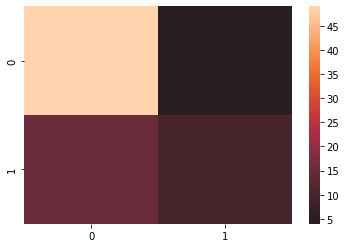

In [13]:

sns.heatmap(cm, center=True)
plt.show()

